# AVOCADO PRICE PREDICTION

## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import the file
df = pd.read_csv('avocado.csv')

## Exploratory Data Analysis

In [3]:
#data processing


In [4]:
df.columns #print the list of columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.shape

(18249, 14)

In [7]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.select_dtypes(include='object').columns # select object type data


Index(['Date', 'type', 'region'], dtype='object')

In [9]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [10]:
#Date is Object type not the date type. We have to change its type to date type
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [11]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


In [12]:
#dealing with missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

#### As per the data , There is no null values , It consist of 18249 complete data and 13 columns. 

In [13]:
#statistical summary
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [14]:
#drop unnamed as it doesn't contribute towards prediction
df.drop('Unnamed: 0',axis=1, inplace=True)

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [16]:
df['type'].unique() #type of avocado

array(['conventional', 'organic'], dtype=object)

In [17]:
df.groupby('type').mean() #type of avocado are available and there mean data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
type,,,,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929,6.177515,15.662722
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868,6.176915,15.662501


In [18]:
#checking the mean price of organic avocado every year
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

#### In above, I am finding that year 2017 is aggressive year where avocado price is higher as compared to other year and 2015 is at second number.

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


#### Most of the column statistics data are near to 0 values.


#### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

## Data Visualization

In [20]:
#In this portion we can plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.

#We use different graph include:

#Bar plot
#Count plot
#Line plot
#Histogram and Pair plot

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

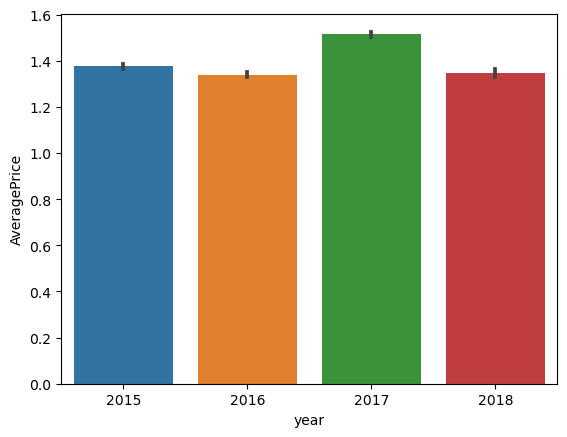

In [21]:
#checking the ratio of year and price
sns.barplot(x='year', y='AveragePrice', data=df)

#### from above data we can conclude that 2017 is year where prices are at top.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

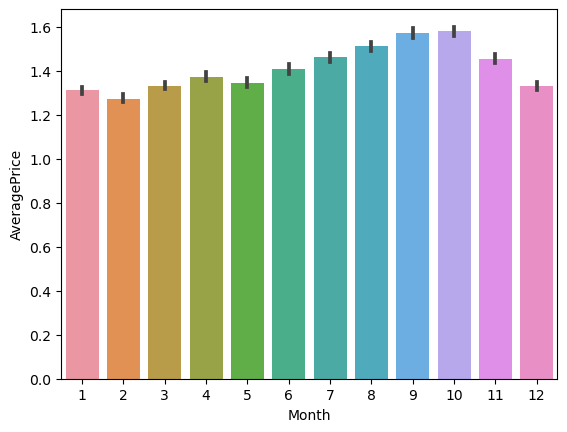

In [22]:
##checking the ratio of month and price
sns.barplot(x='Month', y='AveragePrice', data=df)

#### almost for whole year the price is almost same for the avocado

<Figure size 1600x1000 with 0 Axes>

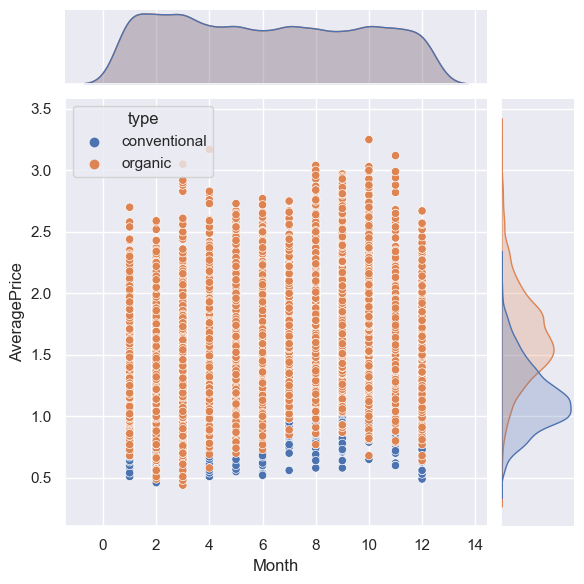

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 10))
sns.jointplot(x='Month', y= 'AveragePrice', hue='type', data=df)
plt.show()

In [24]:
df.pivot_table(index=df['type'], aggfunc='size')

type
conventional    9126
organic         9123
dtype: int64

#### There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado

#dealing with the skewness of the data


#A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension.

##### So, in this we can also check whether the graph is right skewed, left skew or the graph is normally distributed graph

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

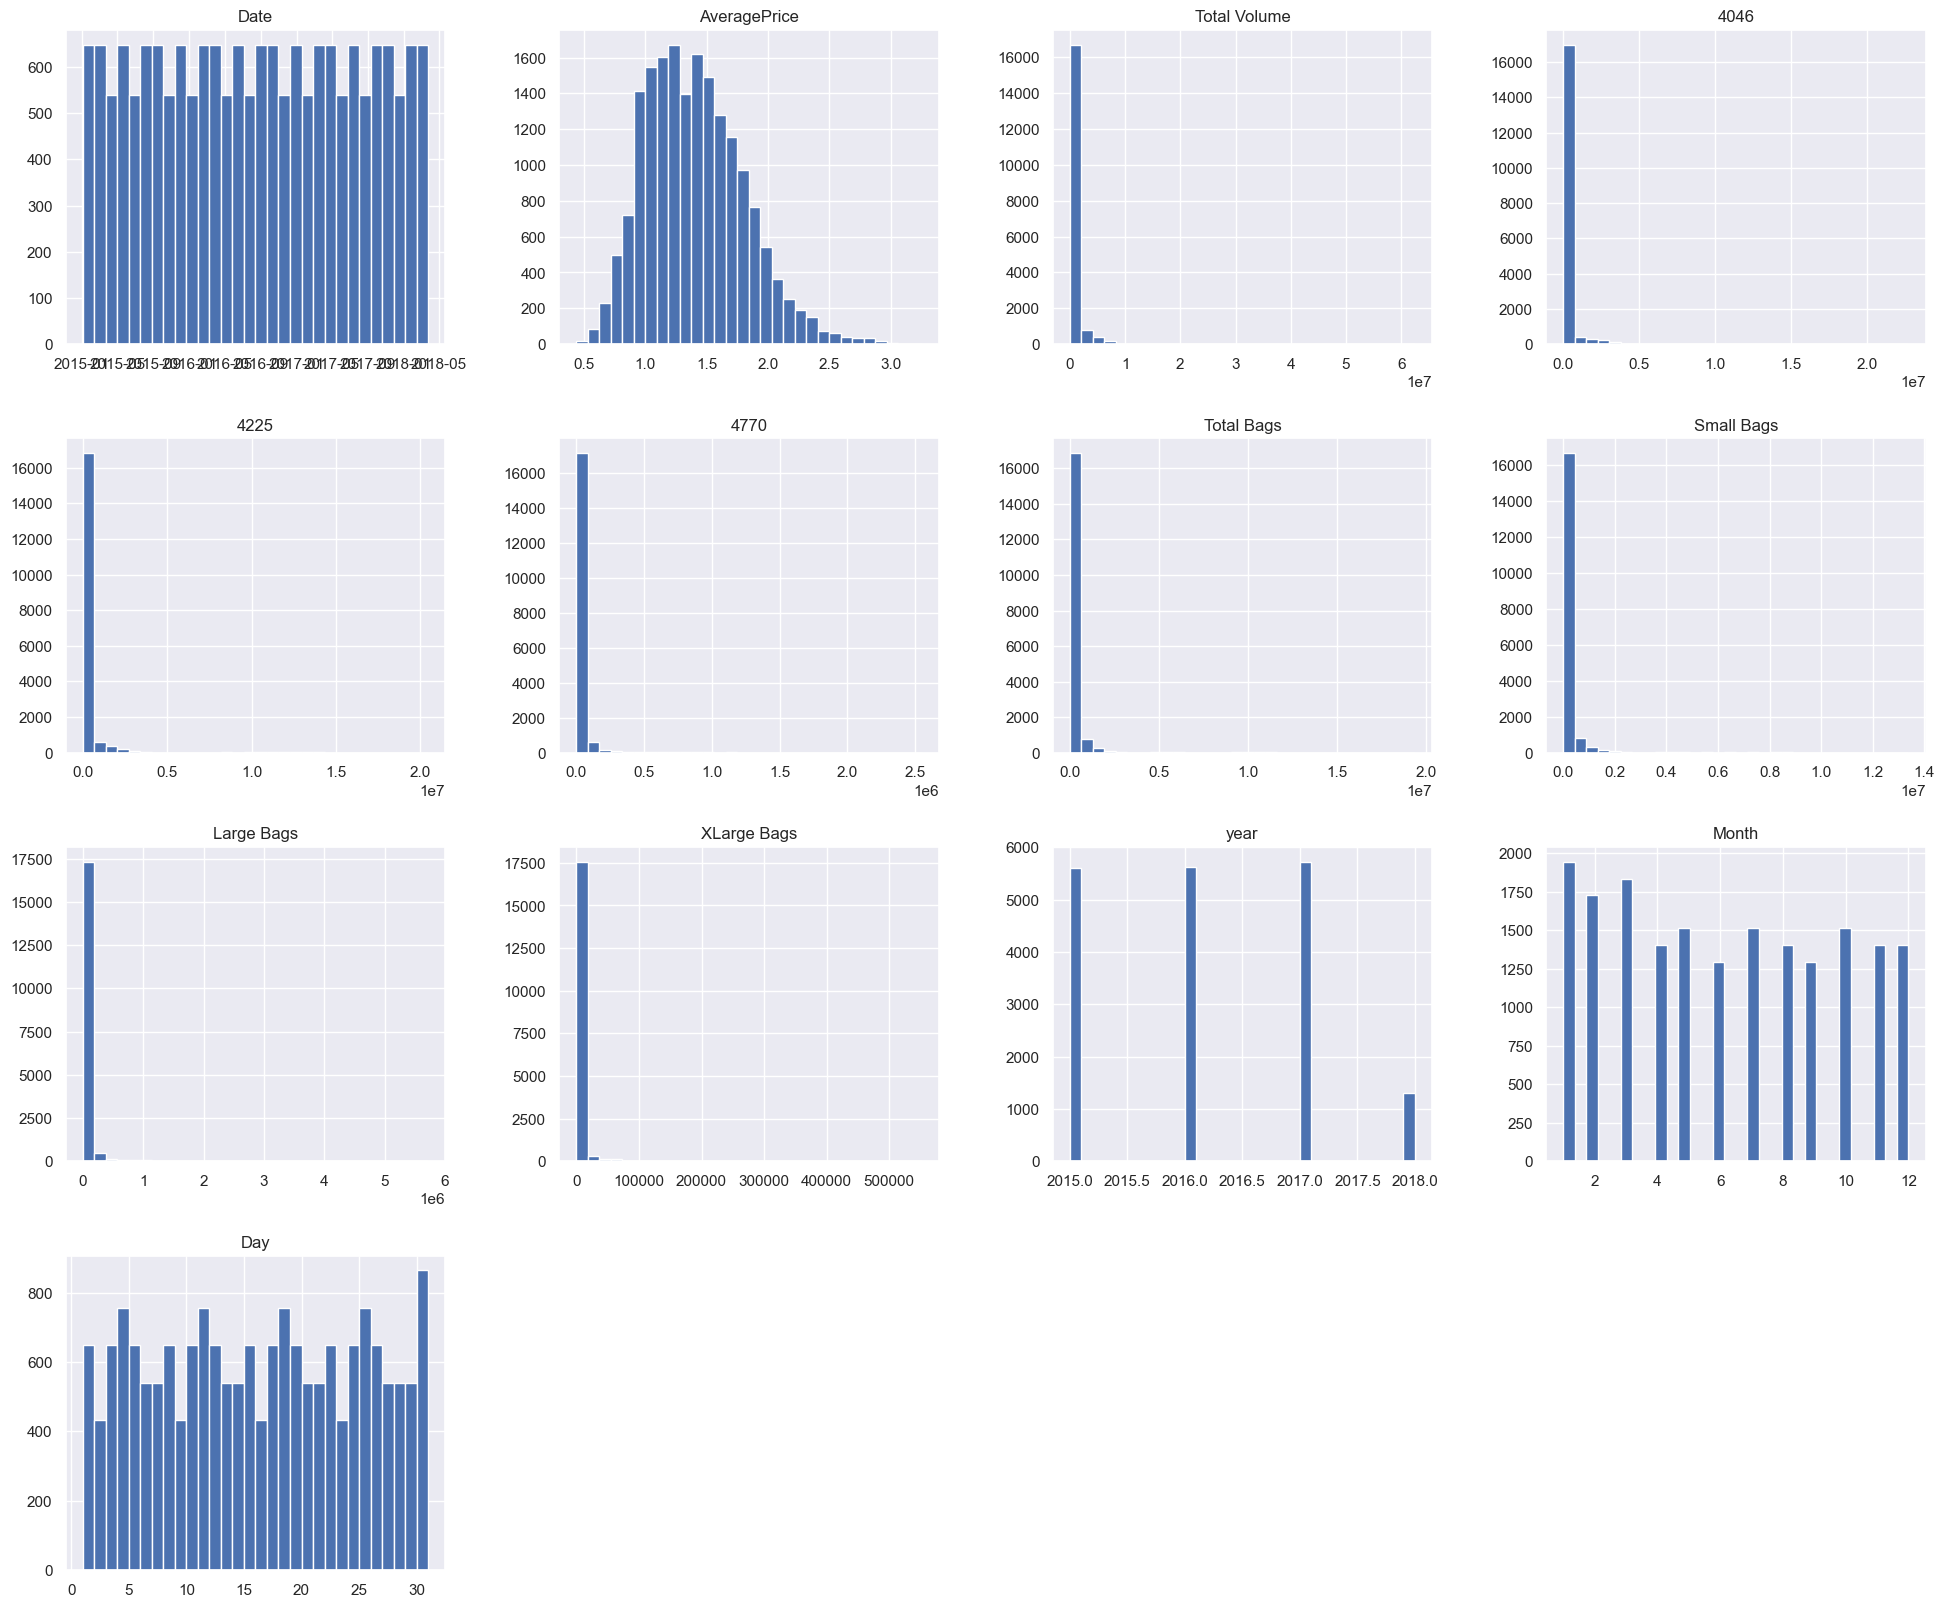

In [25]:
df.hist(figsize=(24, 20), grid=True, layout=(4,4), bins=30)

#### the data are not much varying in term of numbers, so they are almost left skewed data

#make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [26]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

<AxesSubplot:xlabel='AveragePrice'>

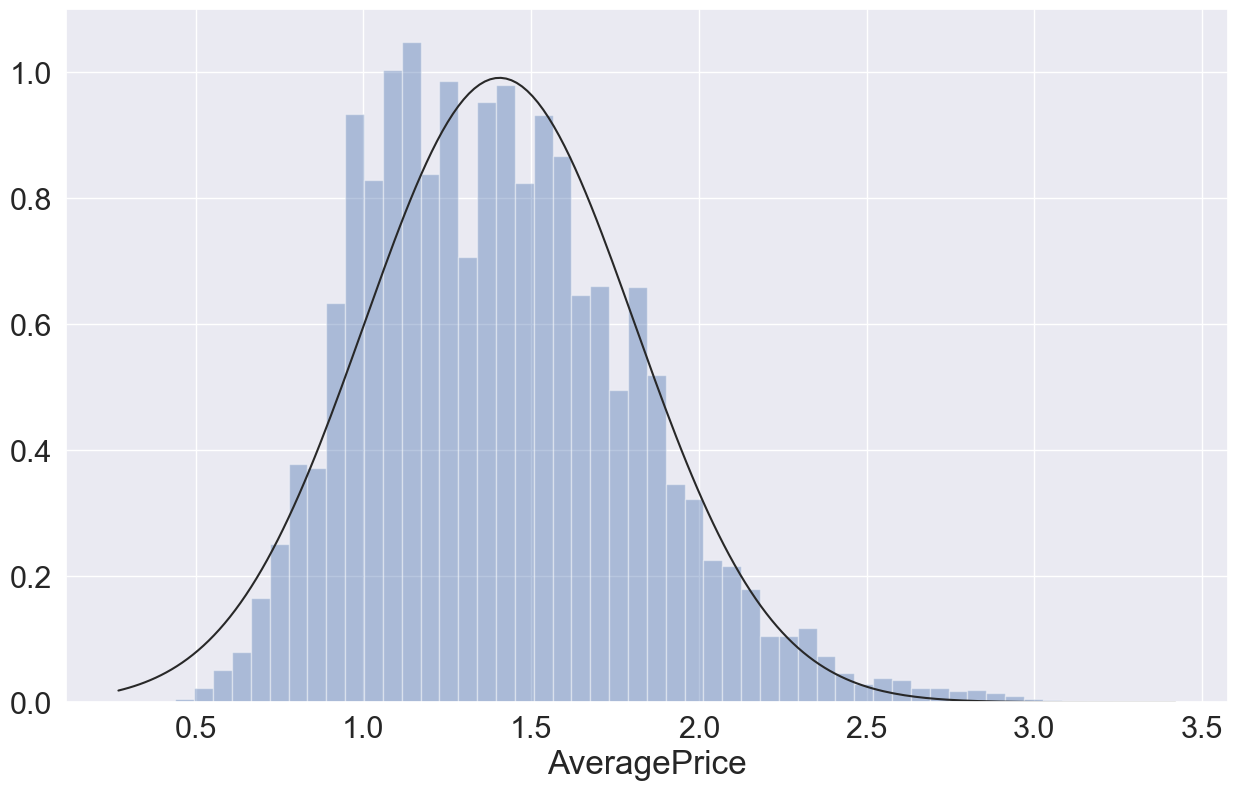

In [27]:
sns.set(font_scale=2.0) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

#### the is how the curve looks like of the dataset(AveragePrice)

#### Let's look at average price of conventional vs. organic

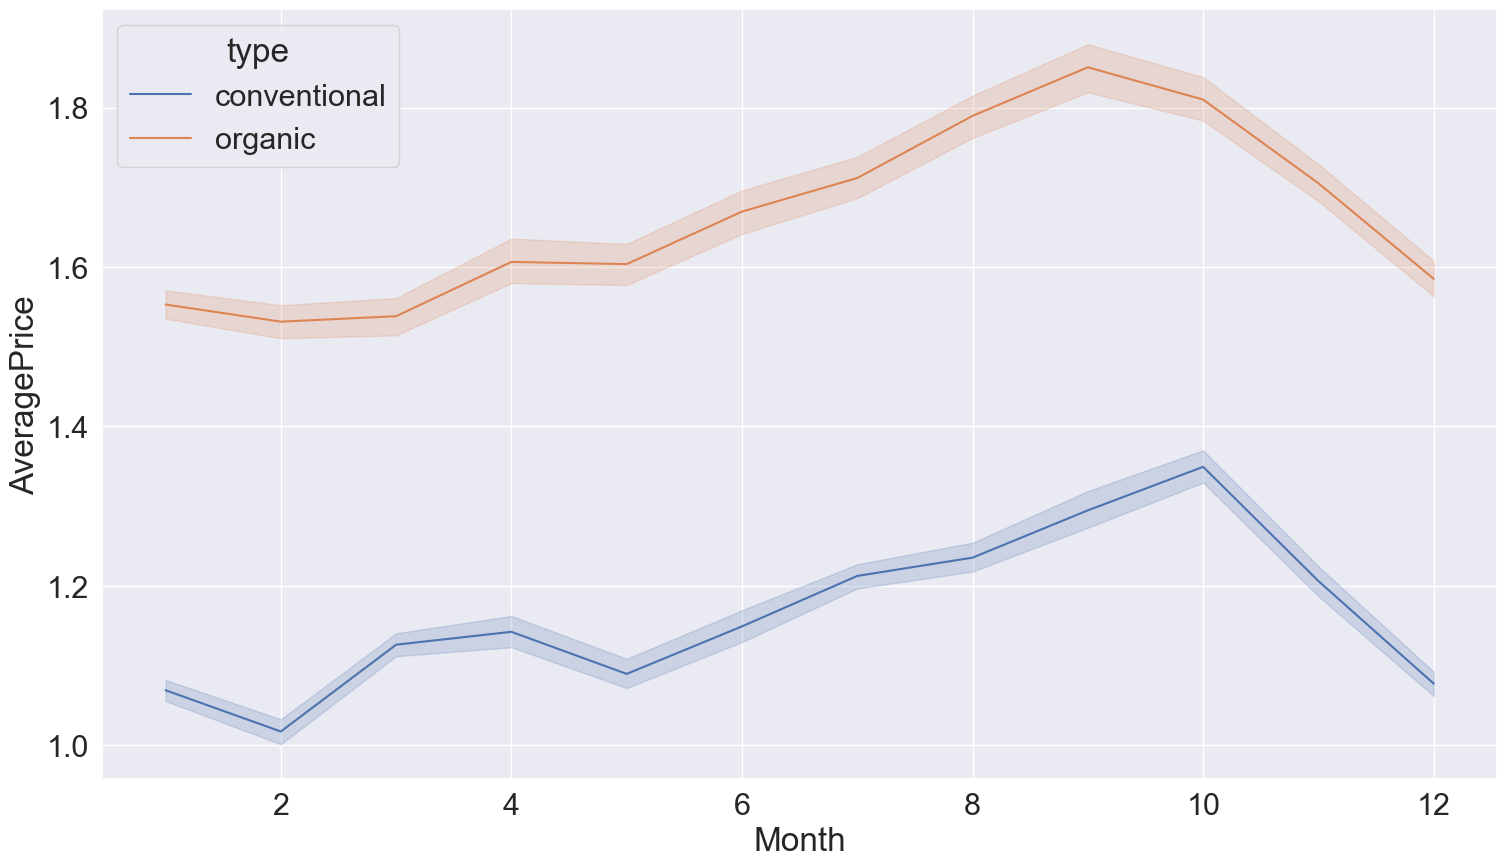

In [28]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

In [29]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [30]:
skew = ('Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

#### The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

## Labeling the dataset

In [31]:
from sklearn.preprocessing import LabelEncoder
#Encode target labels with value between 0 and n_classes-1.

In [32]:
le = LabelEncoder()

In [33]:
obj =['type', 'region']
df[obj] = df[obj].apply(le.fit_transform)

In [34]:
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1418,2015-09-20,1.0,12.319484,11.813067,10.093622,7.38384,11.054353,10.949095,8.750027,1.961502,0,2015,27,9,20


## Outliers

In [35]:
#An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the data set.

<AxesSubplot:xlabel='AveragePrice'>

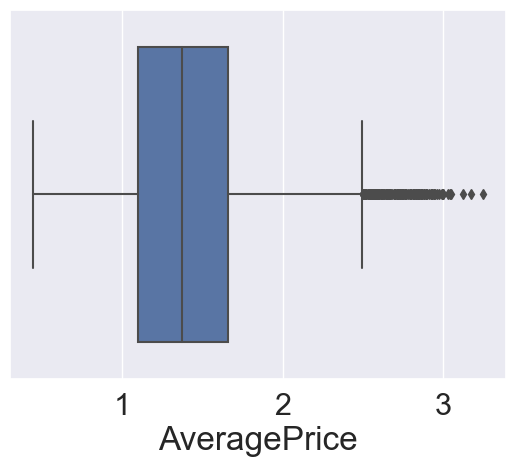

In [36]:
#checking the outliers
#plotting the boxplot of each column to check the outliers
sns.boxplot(df.AveragePrice)

AveragePrice       AxesSubplot(0.125,0.712609;0.133621x0.167391)
Total Volume    AxesSubplot(0.285345,0.712609;0.133621x0.167391)
4046             AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4225            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
4770            AxesSubplot(0.766379,0.712609;0.133621x0.167391)
Total Bags         AxesSubplot(0.125,0.511739;0.133621x0.167391)
Small Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Large Bags       AxesSubplot(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     AxesSubplot(0.606034,0.511739;0.133621x0.167391)
type            AxesSubplot(0.766379,0.511739;0.133621x0.167391)
year                AxesSubplot(0.125,0.31087;0.133621x0.167391)
region           AxesSubplot(0.285345,0.31087;0.133621x0.167391)
Month             AxesSubplot(0.44569,0.31087;0.133621x0.167391)
Day              AxesSubplot(0.606034,0.31087;0.133621x0.167391)
dtype: object

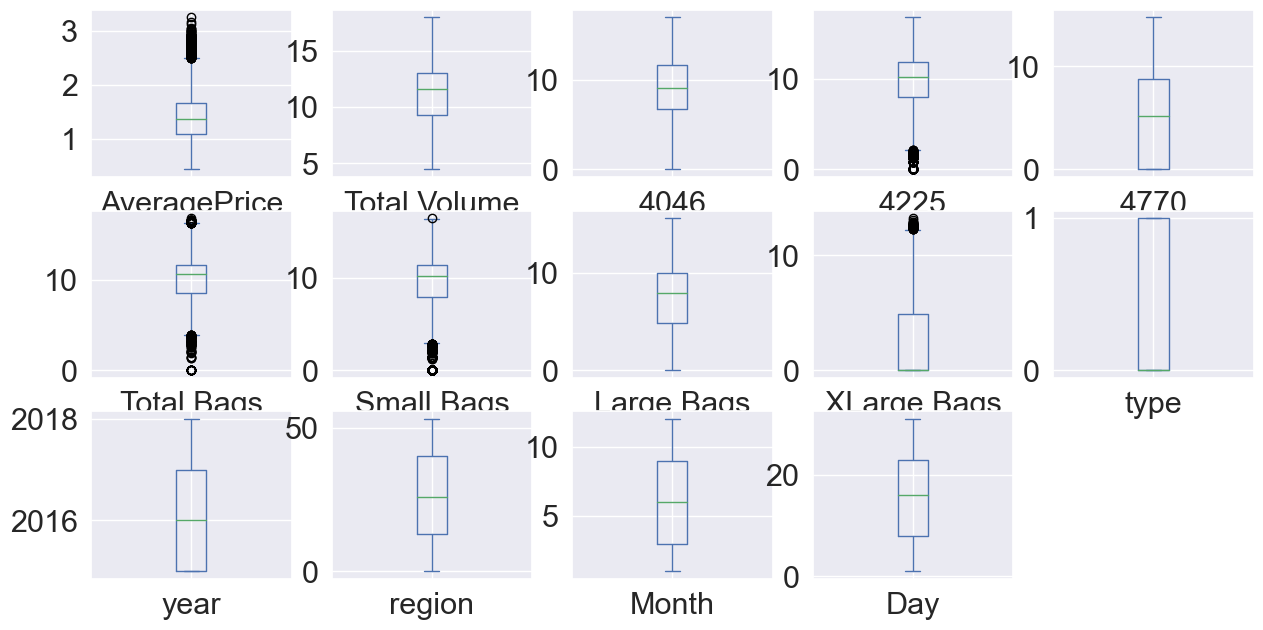

In [37]:
df.plot(kind='box', subplots = True, layout=(4,5), figsize =(15, 10))

#### From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data consist outliers

#### second step is to remove the outliers, there are different way to remove the outliers

#### find the IQR, zscore values.

In [46]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [47]:
columns_to_drop = ['Date', 'Month','Day']
df.drop(columns=columns_to_drop, inplace=True)
#zscore only works on array so we have to drop the date and time columns

In [48]:
from scipy.stats import zscore
#calculating the zscore
z = np.abs(zscore(df))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.107282  0.609752  0.374936  0.279143    0.494074   
1          0.139020      0.175949  0.737707  0.305200  0.233838    0.454761   
2          1.182069      0.158690  0.688840  0.618892  0.042078    0.523041   
3          0.809551      0.017121  0.583598  0.472808  0.181974    0.672335   
4          0.312861      0.207558  0.638425  0.298852  0.171717    0.644845   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.685006  0.407310  0.878279  1.217613    0.299689   
18245      0.755023      0.775077  0.568306  0.594835  1.217613    0.466102   
18246      1.152375      0.778901  0.568251  0.712597  0.370548    0.459975   
18247      1.301382      0.707798  0.494407  0.644192  0.370240    0.391424   
18248      0.531512      0.674542  0.304151  0.726698  0.087895    0.351204   

       Small Bags  Large Bags  XLarge Bags      typ

In [49]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(18249, 12)


In [50]:
#create a new df and assign the values to it
dff = df[(z<3).all(axis = 1)]

In [51]:
print(df.shape)
print(dff.shape)
df = dff


(18249, 12)
(17834, 12)


In [53]:
df.shape # after removing the outliers

(17834, 12)

#### threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3


[]

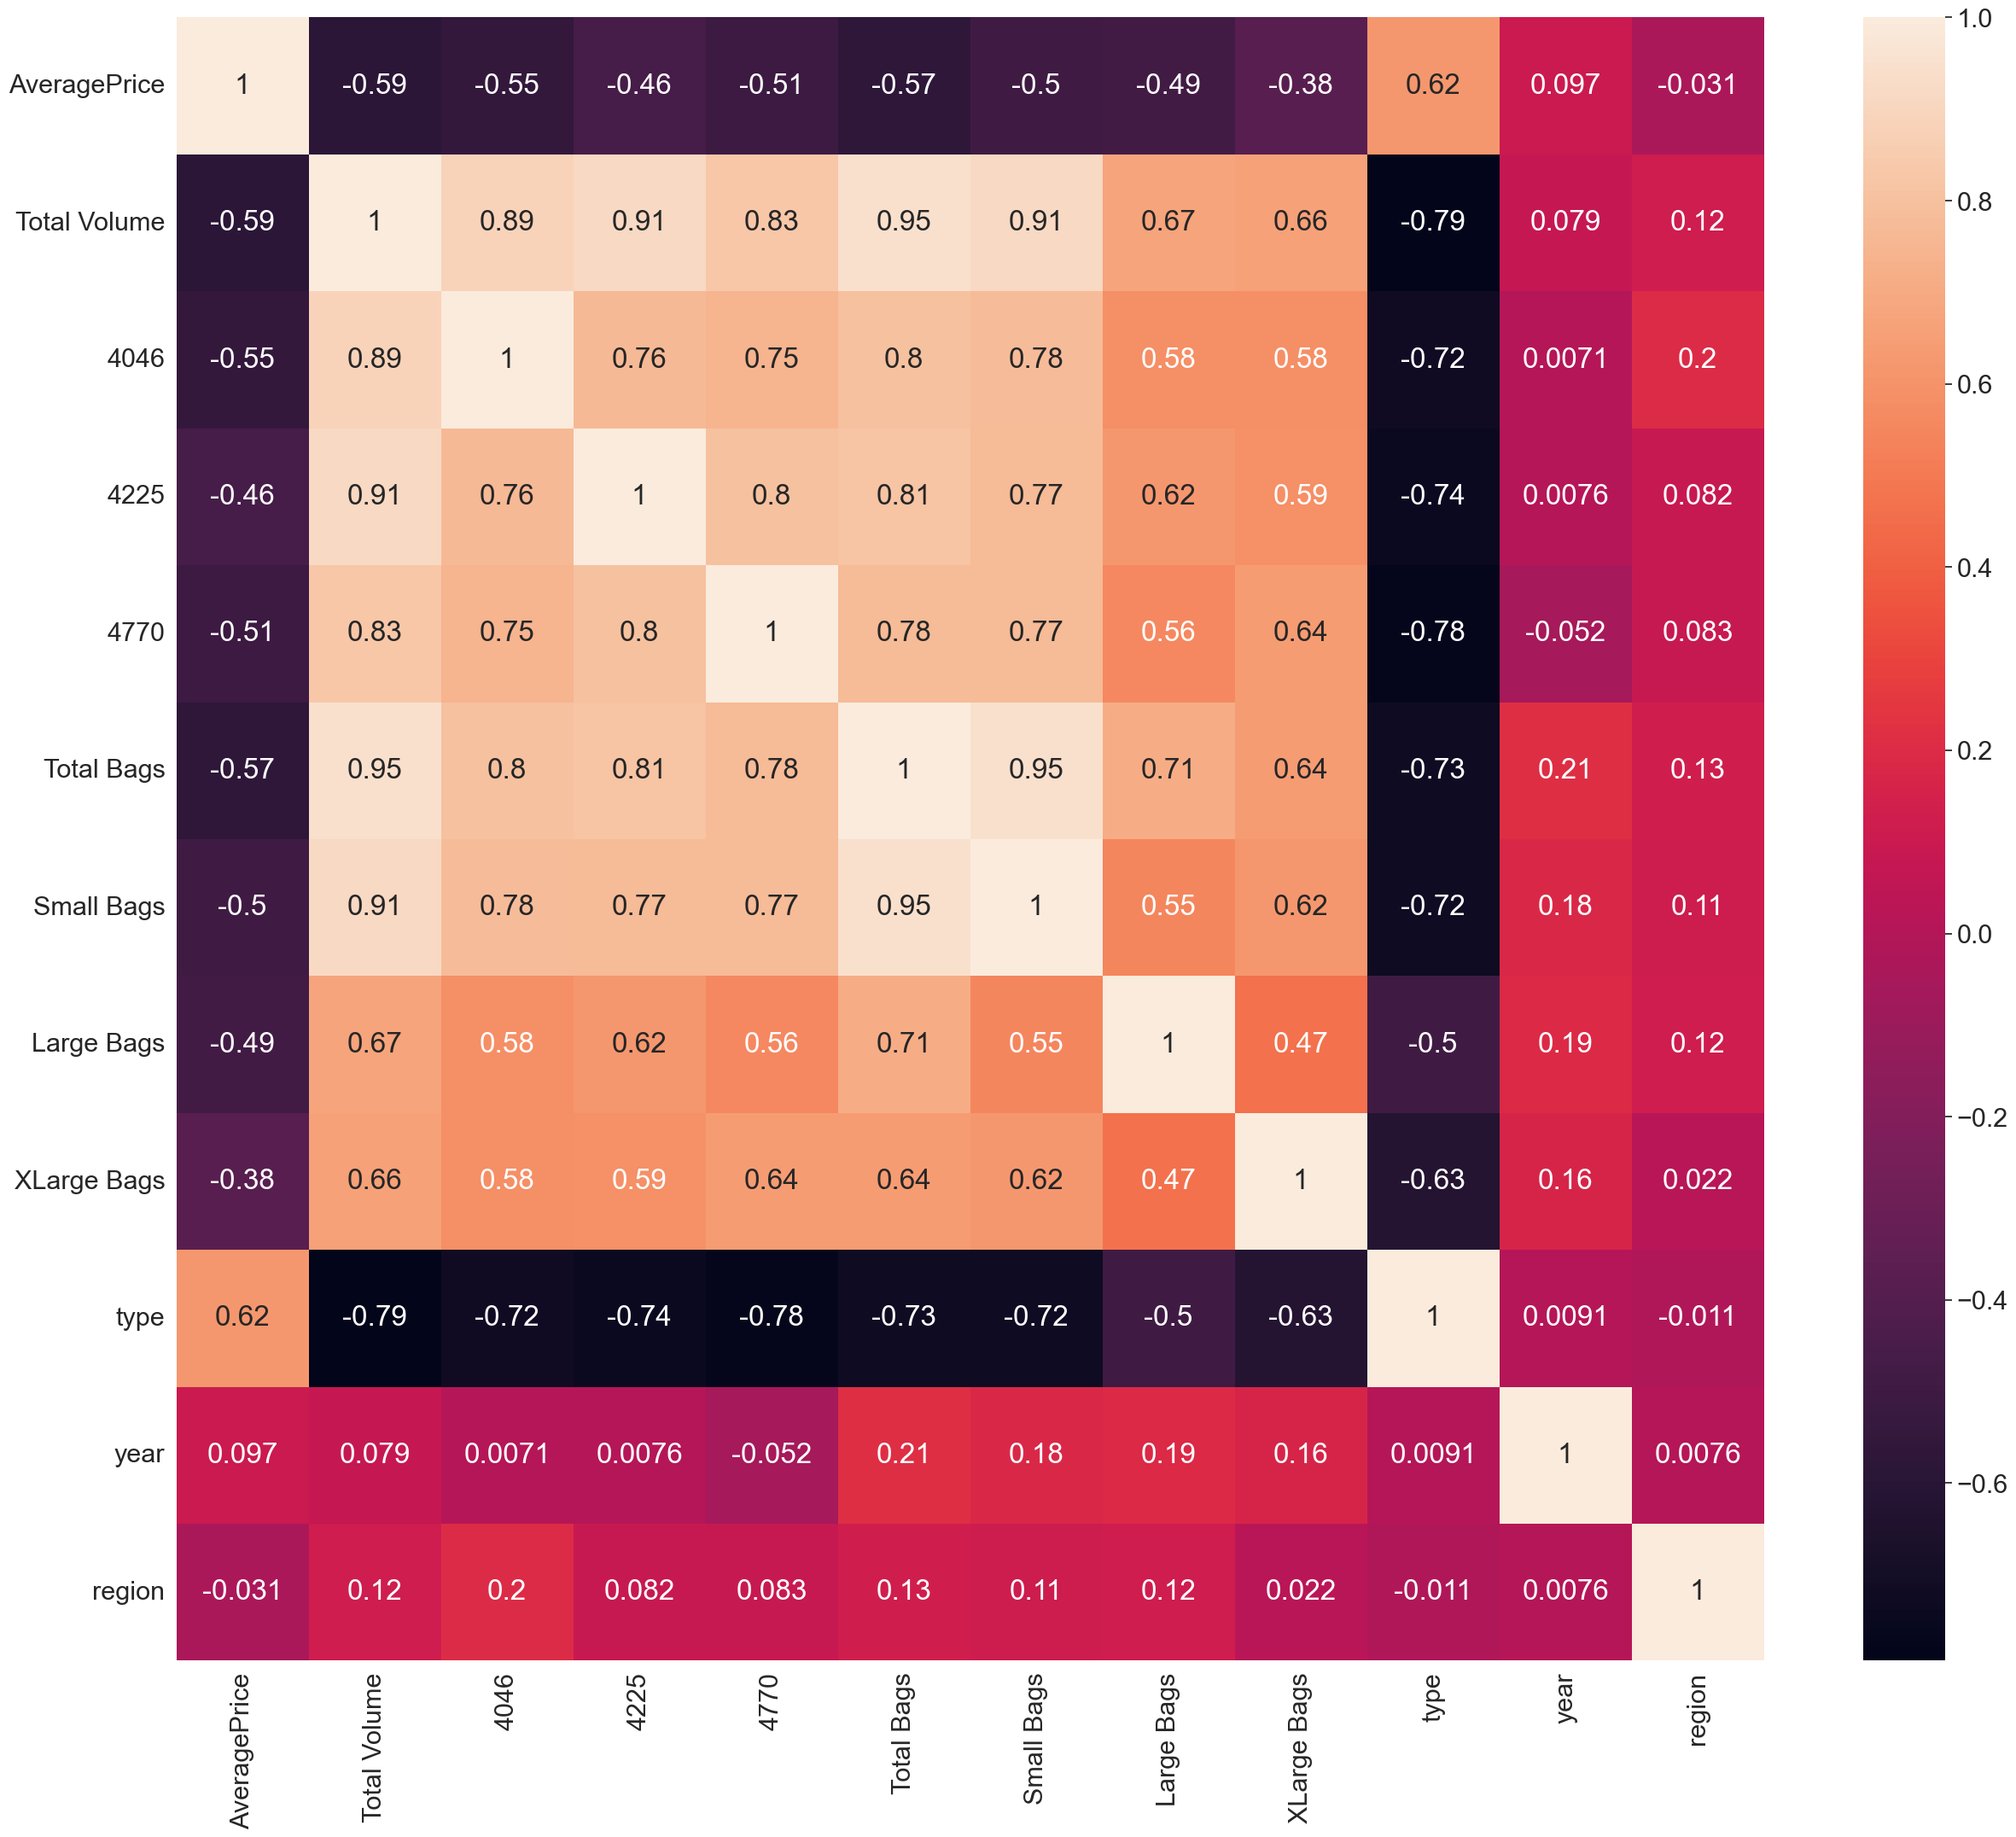

In [58]:
#checking the corelation of all the columns 
correlation = df.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(correlation, annot=True)

plt.plot()


In [84]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


In [77]:
x = df.drop('AveragePrice', axis =1)
y = df

In [79]:
model = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x, train_y, test_y= train_test_split(x,y,random_state = r_state, test_size = 0.33) 
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score (test_y, pre)
        print("R2 score correspond to random state" ,r_state,"is", r2_sc)
              
        if r2_sc> max_r2_score:
              max_r2_score=r2_sc 
              final_state= r_state 
              final_model = i

print()
print()
print()
print()
print("max R2 score correspond to random state model" ,final_state, "is", max_r2_score ,"and model is", final_model)


R2 score correspond to random state 40 is 0.6478175644423823
R2 score correspond to random state 40 is 0.8227416115922508
R2 score correspond to random state 40 is 0.4974116352879431
R2 score correspond to random state 40 is 0.5276940973278677
R2 score correspond to random state 40 is 0.6732804338546637
R2 score correspond to random state 41 is 0.6714604917827026
R2 score correspond to random state 41 is 0.8092145461970581
R2 score correspond to random state 41 is 0.504506824381918
R2 score correspond to random state 41 is 0.5456380878768395
R2 score correspond to random state 41 is 0.6869270207528666
R2 score correspond to random state 42 is 0.6749085786401836
R2 score correspond to random state 42 is 0.8212860447448651
R2 score correspond to random state 42 is 0.49876960917216806
R2 score correspond to random state 42 is 0.5417838194228666
R2 score correspond to random state 42 is 0.6825401143372307
R2 score correspond to random state 43 is 0.6710469667635732
R2 score correspond to r

#### max R2 score correspond to random state model 46 is 0.8307893702546577 and model is KNeighborsRegressor()

In [80]:
#checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearhCV
from sklearn.model_selection import GridSearchCV


In [93]:
train_x, test_x , train_y, test_y = train_test_split(x, y, random_state = 80, test_size = 0.33)
KN = KNeighborsRegressor()
parameters = {'n_neighbors': range(1, 30)}
gridsearch = GridSearchCV( KN,parameters)
gridsearch.fit(train_x, train_y )
gridsearch.best_params_

{'n_neighbors': 4}

In [94]:
KNN = KNeighborsRegressor(n_neighbors=4)
KNN.fit(train_x, train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y, pred)
print("R2 score: ", r2_sc*100)

R2 score:  82.68374311407945


In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
#errors
print('mean absolute error', mean_absolute_error(test_y, pred))
print('mean squared error', mean_squared_error(test_y, pred))
print('root mean absolute error', np.sqrt(mean_absolute_error(test_y, pred
                                                             )))


mean absolute error 0.11430003397893305
mean squared error 0.02568858095480802
root mean absolute error 0.3380828803399147


Text(0, 0.5, 'predicted_y')

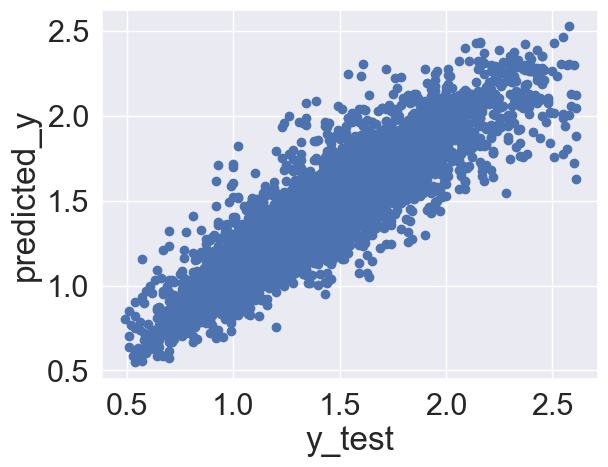

In [97]:
#checking the diff between actual and predicted values using graph
plt.scatter(x=test_y, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted_y')

#### the scatter plot graph and we can see that the actual value and predicted values are very close to each other, so the line is best fit line.